# Step 0: Imports and Reading Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [25]:
df = pd.read_csv('titles.csv')

## Step 1: Data Understanding
- **Dataframe `shape`**
  : Returns a tuple representing the dimensions of the DataFrame. The first element is the number of rows, and the second element is the number of columns.
- **`head` and `tail`**
  : Useful for quickly inspecting the beginning or end of a DataFrame.
- **`dtypes`**
  : Helpful for checking the data types of columns in the DataFrame.
- **`describe`**
  : Generates descriptive statistics of the DataFrame's numerical columns.


In [26]:
df_shape = df.shape
print(f"The DataFrame has {df_shape[0]} rows and {df_shape[1]} columns.")

The DataFrame has 9871 rows and 15 columns.


In [27]:
df.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,NaN,96,"['western', 'drama']",['US'],NaN,tt0031971,7.8,48149.0,11.786,7.7
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,444243.0,26.495,8.3
7,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
8,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,"['comedy', 'romance', 'drama']",['US'],NaN,tt0028010,8.0,23532.0,8.633,7.6
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6


In [28]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [29]:
df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [30]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


# Step 2: Data Preperation
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [31]:
# Renaming Columns

df = df.rename(columns={'id':'ID',
                   'title':'Title',
                   'description':'Description',
                   'release_year':'Year of release'})

In [32]:
# The output is a Series that shows the count of missing values for each column in the DataFrame.

df.isna().sum()

ID                         0
Title                      0
type                       0
Description              119
Year of release            0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [33]:
# This command helps to identify and extract rows in a DataFrame that are duplicates based on all columns.

df.loc[df.duplicated()]

,ID,Title,type,Description,Year of release,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN


In [34]:
# Check for duplicate Title
df.loc[df.duplicated(subset=['Title'])].head(10)

,ID,Title,type,Description,Year of release,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
472,tm99134,Little Men,MOVIE,The former Jo March and her husband Professor ...,1934,NaN,72,"['romance', 'drama']",['US'],NaN,tt0026636,6.2,78.0,1.217,4.0
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
904,tm111211,Custer's Last Stand,MOVIE,Kit Cardigan seeks the killer of his father......,1936,NaN,328,"['western', 'history', 'romance', 'war']",['US'],NaN,tt0126256,4.7,235.0,0.945,4.0
1230,tm104962,Wuthering Heights,MOVIE,The Earnshaws are Yorkshire farmers during the...,1970,G,104,"['drama', 'romance']",['GB'],NaN,tt0066585,6.4,1924.0,3.039,6.6
1944,ts1000,Alice in Wonderland,SHOW,One of the most well-known stories begins one ...,1986,NaN,29,"['scifi', 'fantasy']",['GB'],1.0,tt0421576,7.2,73.0,0.600,7.0
1972,tm23704,Beauty and the Beast,MOVIE,"To save her father, a girl who always puts oth...",1987,G,94,"['romance', 'fantasy', 'family']","['IL', 'US']",NaN,tt0092626,5.9,704.0,7.363,6.3
1978,tm56848,The Hound of the Baskervilles,MOVIE,Sherlock Holmes comes to the aid of his friend...,1983,PG-13,100,"['crime', 'horror', 'thriller']",['GB'],NaN,tt0085692,6.6,1342.0,2.513,6.6
2024,tm131672,Thunder Alley,MOVIE,"A group of friends start a rock band, but as t...",1985,R,111,"['drama', 'music']",['US'],NaN,tt0090168,6.2,411.0,2.736,5.1


In [35]:
# The output is a DataFrame containing only the rows where the specified condition is True.
df.query('Title == "Little Men"')

,ID,Title,type,Description,Year of release,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
459,tm75894,Little Men,MOVIE,Jo March and her husband Professor Bhaer opera...,1940,NaN,84,"['comedy', 'drama']",['US'],NaN,tt0032717,5.7,377.0,1.773,6.1
472,tm99134,Little Men,MOVIE,The former Jo March and her husband Professor ...,1934,NaN,72,"['romance', 'drama']",['US'],NaN,tt0026636,6.2,78.0,1.217,4.0
2402,ts25096,Little Men,SHOW,Little Men is a Canadian television show that ...,1998,TV-PG,45,"['drama', 'family']","['CA', 'US']",2.0,tt0179029,7.4,346.0,6.593,9.0


In [36]:
# This command removes duplicate rows from the DataFrame based on the specified subset of columns ('Title', 'type', 'Year of release'), resets the index, and creates a copy of the modified DataFrame.
df = df.loc[~df.duplicated(subset=['Title','type','Year of release'])] \
    .reset_index(drop=True).copy()

In [37]:
df_shape1 = df.shape
print(f"The New DataFrame has {df_shape1[0]} rows and {df_shape1[1]} columns and the dataset before duplicates cleaning has {df_shape[0]} rows and {df_shape[1]} columns")

The New DataFrame has 9864 rows and 15 columns and the dataset before duplicates cleaning has 9871 rows and 15 columns


# Step 3: Exploratory Analysis
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE

In [38]:
df['Year of release'].value_counts()

2021    854
2019    807
2020    698
2018    685
2017    581
       ... 
1919      4
1914      2
1916      2
1912      1
1917      1
Name: Year of release, Length: 110, dtype: int64

Text(0, 0.5, 'Count of Releases')

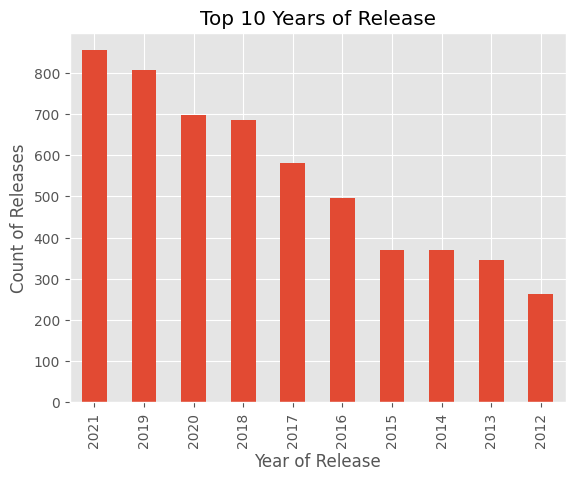

In [40]:
ax = df['Year of release'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years of Release')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Count of Releases')

Text(0.5, 0, 'Runtime(mins)')

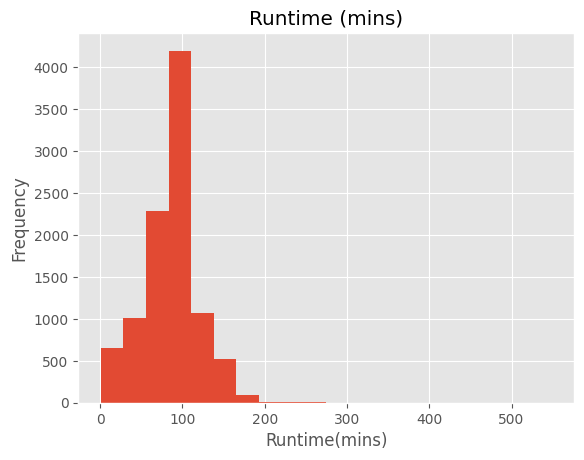

In [41]:
ax = df['runtime'].plot(kind='hist',
                          bins=20,
                          title='Runtime (mins)')
ax.set_xlabel('Runtime(mins)')

Text(0.5, 0, 'Runtime(mins)')

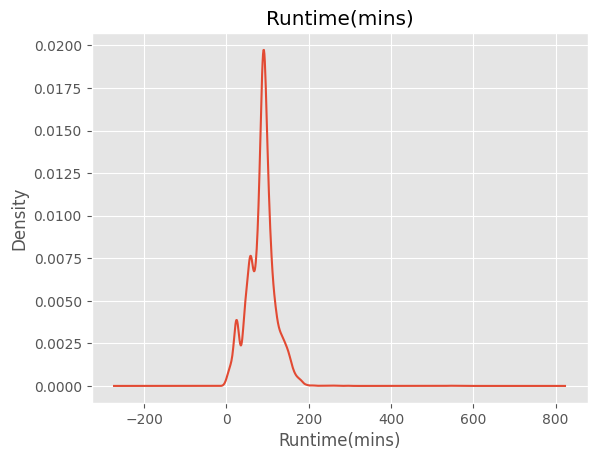

In [42]:
ax = df['runtime'].plot(kind='kde',
                          title='Runtime(mins)')
ax.set_xlabel('Runtime(mins)')

In [44]:
type_counts = df['type'].value_counts()

print(f"The counts of unique values in the 'type' column are:\n{type_counts}")

The counts of unique values in the 'type' column are:
MOVIE    8507
SHOW     1357
Name: type, dtype: int64


# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation


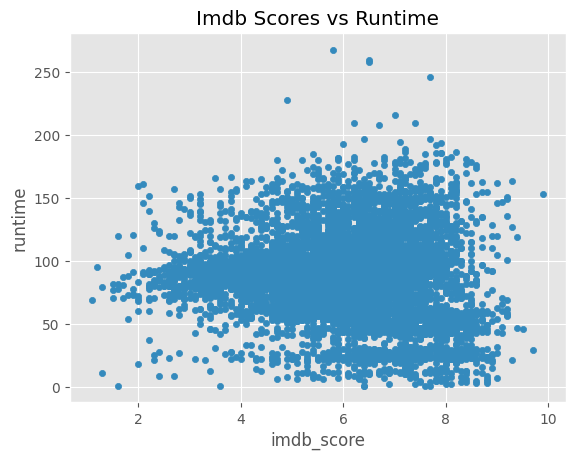

In [28]:
df.plot(kind='scatter',
        x='imdb_score',
        y='runtime',
        title='Imdb Scores vs Runtime')
plt.show()

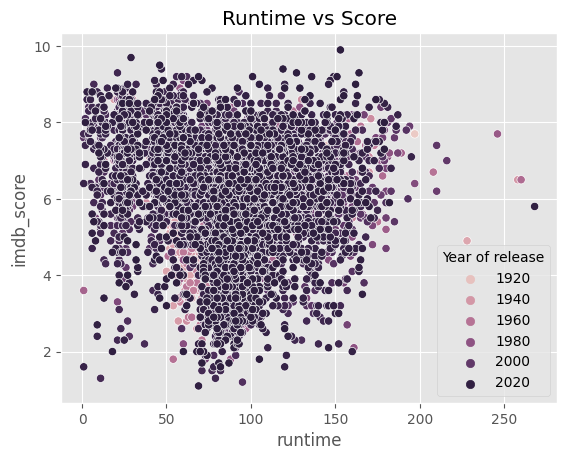

In [30]:
ax = sns.scatterplot(x='runtime',
                y='imdb_score',
                hue='Year of release',
                data=df)
ax.set_title('Runtime vs Score')
plt.show()

In [19]:
df_corr = df[['Year of release','imdb_score',
    'runtime','imdb_votes']].dropna().corr()
df_corr

,Year of release,imdb_score,runtime,imdb_votes
Year of release,1.000000,0.034221,0.100156,0.024352
imdb_score,0.034221,1.000000,-0.100235,0.165877
runtime,0.100156,-0.100235,1.000000,0.100214
imdb_votes,0.024352,0.165877,0.100214,1.000000


<Axes: >

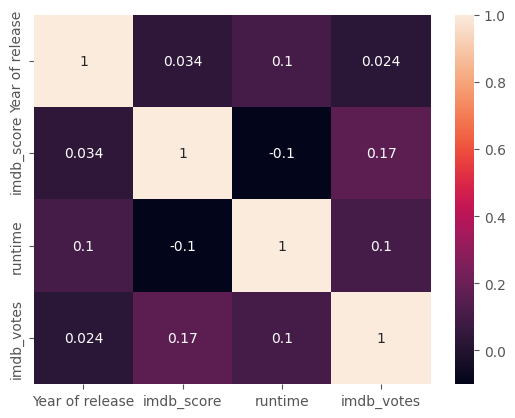

In [20]:
sns.heatmap(df_corr, annot=True)

# Step 5: Ask a Question about the data
- Try to answer a question you have about the data using a plot or statistic.

What are the Top 10 Title with highest IMDB rating (minimum of 8)?

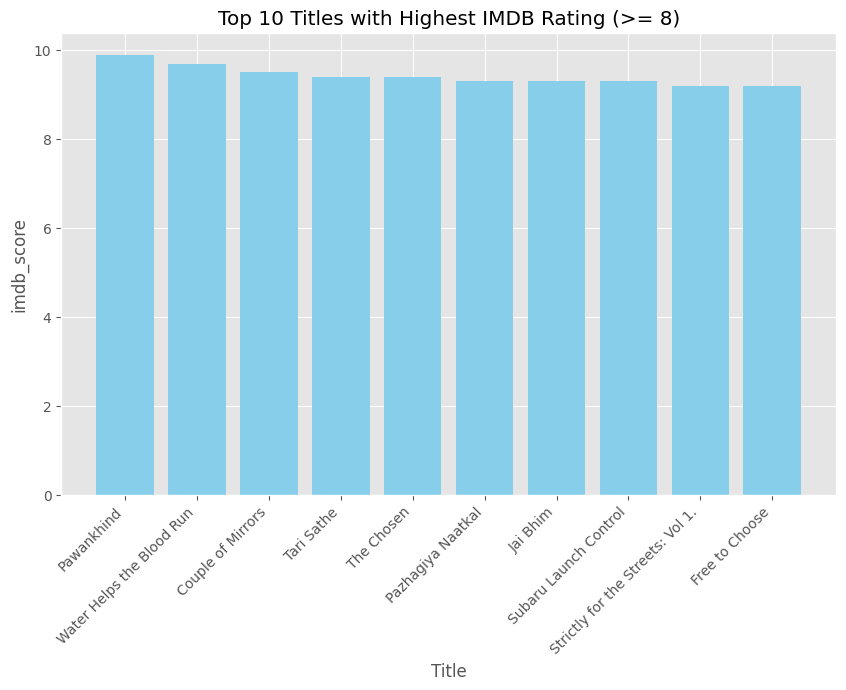

In [24]:
filtered_df = df[df['imdb_score'] >= 8.0]

top_10_movies = filtered_df.sort_values(by='imdb_score', ascending=False).head(10)

# Plotting a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies['Title'], top_10_movies['imdb_score'], color='skyblue')
plt.xlabel('Title')
plt.ylabel('imdb_score')
plt.title('Top 10 Titles with Highest IMDB Rating (>= 8)')
plt.xticks(rotation=45, ha='right')
plt.show()

Which is the title with highest imdb rating?

In [46]:
filtered_df = df[df['imdb_score'] >=5]

max_rating_row = filtered_df.loc[filtered_df['imdb_score'].idxmax()]

# Extract the title and its IMDb rating
highest_rated_title = max_rating_row['Title']
highest_imdb_rating = max_rating_row['imdb_score']

# Print the result
print(f"The title with the highest IMDb rating is '{highest_rated_title}' with a rating of {highest_imdb_rating}.")

The title with the highest IMDb rating is 'Pawankhind' with a rating of 9.9.


Which is the title with lowest imdb rating?

In [47]:
filtered_df = df[df['imdb_score'] < 5]
min_rating_row = filtered_df.loc[filtered_df['imdb_score'].idxmin()]

# Extract the title and its IMDb rating
lowest_rated_title = min_rating_row['Title']
lowest_imdb_rating = min_rating_row['imdb_score']

print(f"The title with the lowest IMDb rating is '{lowest_rated_title}' with a rating of {lowest_imdb_rating}.")

The title with the lowest IMDb rating is 'Finding Jesus' with a rating of 1.1.


# Add a new column in existing data set showing recommendation of the titles.


In [48]:


# Define a function to determine the recommendation based on IMDb rating
def get_recommendation(imdb_score):
    if imdb_score > 8:
        return 'Highly Recommended'
    elif 4 <= imdb_score <= 8:
        return 'Somewhat Recommended'
    else:
        return 'Not Recommended'

# Add a new column 'Recommendation' based on the conditions
df['Recommendation'] = df['imdb_score'].apply(get_recommendation)

# Display the updated DataFrame
print(df)


             ID                            Title   type  \
0       ts20945                The Three Stooges   SHOW   
1       tm19248                      The General  MOVIE   
2       tm82253      The Best Years of Our Lives  MOVIE   
3       tm83884                  His Girl Friday  MOVIE   
4       tm56584                In a Lonely Place  MOVIE   
...         ...                              ...    ...   
9859   tm510327                     Lily Is Here  MOVIE   
9860  tm1079144  Jay Nog: Something from Nothing  MOVIE   
9861   tm847725                          Chasing  MOVIE   
9862  tm1054116                         Baikunth  MOVIE   
9863   ts275838                 Waking Up Eighty   SHOW   

                                            Description  Year of release  \
0     The Three Stooges were an American vaudeville ...             1934   
1     During America’s Civil War, Union spies steal ...             1926   
2     It's the hope that sustains the spirit of ever...        

In [57]:
df.head(5)

,ID,Title,type,Description,Year of release,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Recommendation
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Highly Recommended
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,Highly Recommended
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,Highly Recommended
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,Somewhat Recommended
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,Somewhat Recommended


In [61]:

# Function to get Title and Genre based on ID
def get_title_and_genre_by_id(input_id):
    result = df[df['ID'] == input_id][['Title', 'genres']]

    if not result.empty:
        return result.iloc[0]
    else:
        return f"No match found for ID {input_id}"




In [60]:
# Example usage
input_id = 'ts20945'
result = get_title_and_genre_by_id(input_id)

print(result)

Title                                     The Three Stooges
genres    ['comedy', 'family', 'animation', 'action', 'f...
Name: 0, dtype: object


In [62]:
# Example usage
input_id = '45'
result = get_title_and_genre_by_id(input_id)

print(result)

No match found for ID 45


In [72]:

def count_films_released_by_year(year):

    try:



        total_films = df[df['Year of release'] == year].shape[0]

        return total_films

    except Exception as e:
        print(f"Error: {e}")
        return 0  # Return 0 if an error occurs


In [73]:

# Example usage

target_year = 2022

total_films_2022 = count_films_released_by_year(target_year)
print(f"Total number of films released in {target_year}: {total_films_2022}")

Total number of films released in 2022: 89


In [75]:
# Example usage

target_year1 = 2023

total_films_2023= count_films_released_by_year(2023)
print(f"Total number of films released in {target_year1}: {total_films_2023}")

Total number of films released in 2023: 0
